In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sns
import sklearn.tree as tree
from sklearn.decomposition import PCA

sns.set(style="white")
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline

In [2]:
missing_value = ["nan"]
df = pd.read_csv("train.csv",na_values = missing_value)
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [3]:
dt_clear_na = df.dropna()

In [4]:
dt_clear_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642925 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               642925 non-null  int64  
 1   VisitNumber            642925 non-null  int64  
 2   Weekday                642925 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              642925 non-null  int64  
 5   DepartmentDescription  642925 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.2+ MB


In [5]:
dt_clear_na.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP',
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
    

In [6]:
features = ["Return",'FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP',
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
       'LIQUOR,WINE,BEER', 'SLEEPWEAR/FOUNDATIONS',
       'CAMERAS AND SUPPLIES', 'SPORTING GOODS',
       'PLAYERS AND ELECTRONICS', 'PHARMACY RX', 'MENSWEAR',
       'OPTICAL - FRAMES', 'SWIMWEAR/OUTERWEAR', 'OTHER DEPARTMENTS',
       'MEDIA AND GAMING', 'FURNITURE', 'OPTICAL - LENSES', 'SEASONAL',
       'LARGE HOUSEHOLD GOODS', '1-HR PHOTO', 'CONCEPT STORES',
       'HEALTH AND BEAUTY AIDS']

In [7]:
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'Return': np.max,'FINANCIAL SERVICES': np.sum, 'SHOES': np.sum, 'PERSONAL CARE': np.sum,
       'PAINT AND ACCESSORIES': np.sum, 'DSD GROCERY': np.sum, 'MEAT - FRESH & FROZEN': np.sum,
       'DAIRY': np.sum, 'PETS AND SUPPLIES': np.sum, 'HOUSEHOLD CHEMICALS/SUPP': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'PRODUCE': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum,
       'GROCERY DRY GOODS': np.sum, 'BOYS WEAR': np.sum, 'FABRICS AND CRAFTS': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'MENS WEAR': np.sum, 'ACCESSORIES': np.sum,
       'HOME MANAGEMENT': np.sum, 'FROZEN FOODS': np.sum, 'SERVICE DELI': np.sum,
       'INFANT CONSUMABLE HARDLINES': np.sum, 'PRE PACKED DELI': np.sum, 'COOK AND DINE': np.sum,
       'PHARMACY OTC': np.sum, 'LADIESWEAR': np.sum, 'COMM BREAD': np.sum, 'BAKERY': np.sum,
       'HOUSEHOLD PAPER GOODS': np.sum, 'CELEBRATION': np.sum, 'HARDWARE': np.sum, 'BEAUTY': np.sum,
       'AUTOMOTIVE': np.sum, 'BOOKS AND MAGAZINES': np.sum, 'SEAFOOD': np.sum, 'OFFICE SUPPLIES': np.sum,
       'LAWN AND GARDEN': np.sum, 'SHEER HOSIERY': np.sum, 'WIRELESS': np.sum, 'BEDDING': np.sum,
       'BATH AND SHOWER': np.sum, 'HORTICULTURE AND ACCESS': np.sum, 'HOME DECOR': np.sum, 'TOYS': np.sum,
       'INFANT APPAREL': np.sum, 'LADIES SOCKS': np.sum, 'PLUS AND MATERNITY': np.sum,
       'ELECTRONICS': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'LIQUOR,WINE,BEER': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'SPORTING GOODS': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PHARMACY RX': np.sum, 'MENSWEAR': np.sum,
       'OPTICAL - FRAMES': np.sum, 'SWIMWEAR/OUTERWEAR': np.sum, 'OTHER DEPARTMENTS': np.sum,
       'MEDIA AND GAMING': np.sum, 'FURNITURE': np.sum, 'OPTICAL - LENSES': np.sum, 'SEASONAL': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, '1-HR PHOTO': np.sum, 'CONCEPT STORES': np.sum,
       'HEALTH AND BEAUTY AIDS': np.sum})
    data = grouped[["TripType", "Weekday", "Return",'FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP',
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
       'LIQUOR,WINE,BEER', 'SLEEPWEAR/FOUNDATIONS',
       'CAMERAS AND SUPPLIES', 'SPORTING GOODS',
       'PLAYERS AND ELECTRONICS', 'PHARMACY RX', 'MENSWEAR',
       'OPTICAL - FRAMES', 'SWIMWEAR/OUTERWEAR', 'OTHER DEPARTMENTS',
       'MEDIA AND GAMING', 'FURNITURE', 'OPTICAL - LENSES', 'SEASONAL',
       'LARGE HOUSEHOLD GOODS', '1-HR PHOTO', 'CONCEPT STORES',
       'HEALTH AND BEAUTY AIDS']]
    
    
    #data.head()
    return data
train_data=transform_my_data(dt_clear_na)
train_data.shape

/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

(94247, 71)

In [8]:
def transform(day,no):
    global train_data
    train_data=train_data.replace(day,no)
    return;
transform("Monday", 1)
transform("Tuesday", 2)
transform("Wednesday", 3)
transform("Thursday", 4)
transform("Friday", 5)
transform("Saturday", 6)
transform("Sunday", 7)

In [9]:
train, test = train_test_split(train_data, test_size = 0.3)

In [10]:
train_data = train
train_data.describe()
train_data.shape

(65972, 71)

In [11]:
train_data.head()

,TripType,Weekday,Return,FINANCIAL SERVICES,SHOES,PERSONAL CARE,PAINT AND ACCESSORIES,DSD GROCERY,MEAT - FRESH & FROZEN,DAIRY,...,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,HEALTH AND BEAUTY AIDS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
43314,9,5,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176229,3,5,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18351,3,7,0.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27256,41,2,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36794,8,3,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


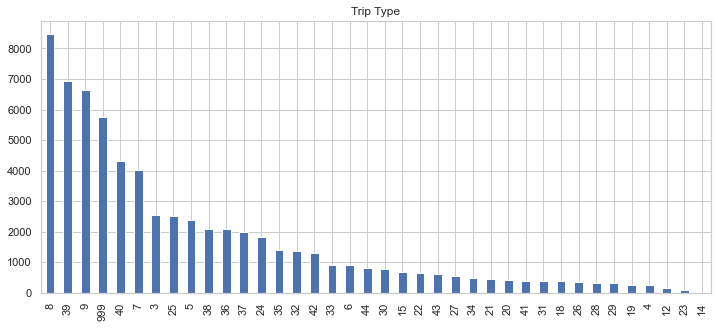

In [12]:
plt.figure(figsize=(12,5))
train_data['TripType'].value_counts().plot(kind='bar',title="Trip Type")

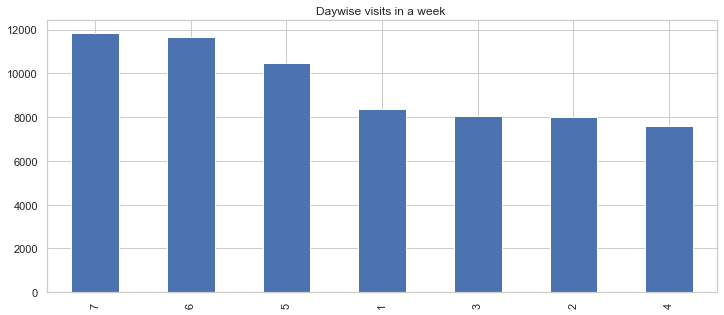

In [13]:

plt.figure(figsize=(12,5))
train_data['Weekday'].value_counts().plot(kind='bar',title="Daywise visits in a week ")

In [14]:
train_data.T.apply(lambda x: x.nunique(),axis=1)

TripType                  38
Weekday                    7
Return                     2
FINANCIAL SERVICES        16
SHOES                     16
                          ..
SEASONAL                   2
LARGE HOUSEHOLD GOODS      2
1-HR PHOTO                12
CONCEPT STORES             3
HEALTH AND BEAUTY AIDS     3
Length: 71, dtype: int64

In [15]:
def get_count(values):
    return len(values)
grouped_count = train_data.groupby(['Weekday',"TripType"]).TripType.agg(get_count)
grouped_count

Weekday  TripType
1        3           302
         4            39
         5           303
         6           100
         7           575
                    ... 
7        41           87
         42          280
         43          104
         44          145
         999         946
Name: TripType, Length: 261, dtype: int64

In [16]:
train_array = train.values
test_array = test.values

In [17]:
X_train = train_array[:,2:]
Y_train = train_array[:,1]
X_test = test_array[:,2:]
Y_test = test_array[:,1]

In [18]:
pca = PCA()
fit = pca.fit(X_train)

In [55]:
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clfr = RandomForestClassifier(n_estimators=100)
clfr.fit(X_t_train, Y_train)

RandomForestClassifier()

In [56]:
pred_test =  clfr.predict(X_t_test)
pred_train = clfr.predict(X_t_train)

In [57]:
pd.crosstab(Y_test,pred_test , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
True,,,,,,,,
1.0,302,208,198,183,712,888,993,3484
2.0,266,213,217,167,677,812,986,3338
3.0,282,208,201,178,690,820,959,3338
4.0,282,229,201,212,698,874,943,3439
5.0,331,240,246,239,1030,1183,1256,4525
6.0,326,285,266,254,986,1350,1548,5015
7.0,406,317,251,255,884,1381,1642,5136
All,2195,1700,1580,1488,5677,7308,8327,28275


In [22]:
pd.crosstab(Y_test,pred_test , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

         1.0       0.13      0.08      0.10      3484
         2.0       0.12      0.06      0.08      3338
         3.0       0.12      0.06      0.08      3338
         4.0       0.14      0.06      0.09      3439
         5.0       0.18      0.23      0.20      4525
         6.0       0.19      0.28      0.23      5015
         7.0       0.20      0.32      0.25      5136

    accuracy                           0.18     28275
   macro avg       0.15      0.16      0.15     28275
weighted avg       0.16      0.18      0.16     28275



In [58]:
accuracy_score(Y_train, pred_train), accuracy_score(Y_test, pred_test)

(0.6445006972655066, 0.17506631299734748)

In [24]:
pd.crosstab(Y_train,pred_train , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

         1.0       0.73      0.61      0.66      8355
         2.0       0.76      0.57      0.66      7987
         3.0       0.77      0.56      0.65      8054
         4.0       0.76      0.57      0.65      7604
         5.0       0.52      0.70      0.60     10468
         6.0       0.62      0.69      0.65     11675
         7.0       0.61      0.72      0.66     11829

    accuracy                           0.64     65972
   macro avg       0.68      0.63      0.65     65972
weighted avg       0.67      0.64      0.65     65972



In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X = X_t_train, y = Y_train)
predictions = lr.predict(X_t_test)
pred_train = lr.predict(X_t_train)
pd.crosstab(Y_test,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
True,,,,,,,,
1.0,19,11,3,13,470,1163,1805,3484
2.0,10,6,3,8,448,1098,1765,3338
3.0,15,9,3,13,480,1156,1662,3338
4.0,11,7,4,17,457,1297,1646,3439
5.0,15,14,9,15,711,1671,2090,4525
6.0,21,13,5,17,582,1928,2449,5015
7.0,13,10,1,11,517,1754,2830,5136
All,104,70,28,94,3665,10067,14247,28275


In [27]:
accuracy_score(Y_train, pred_train), accuracy_score(Y_test,pred_test)

(0.19558297459528284, 0.17534924845269673)

In [28]:
#KNN classifier

knc = KNeighborsClassifier(n_neighbors=5)
knc = knc.fit(X = X_t_train, y = Y_train)

predictions = knc.predict(X_t_test)
pred_train = knc.predict(X_t_train)
pd.crosstab(Y_test,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
True,,,,,,,,
1.0,732,583,376,366,528,458,441,3484
2.0,739,584,384,329,485,421,396,3338
3.0,672,594,352,361,535,405,419,3338
4.0,718,623,339,365,551,443,400,3439
5.0,886,757,480,509,749,588,556,4525
6.0,991,817,535,519,771,713,669,5015
7.0,1088,812,513,505,798,733,687,5136
All,5826,4770,2979,2954,4417,3761,3568,28275


In [29]:
accuracy_score(Y_train, pred_train), accuracy_score(Y_test,pred_test)

(0.322758139816892, 0.17534924845269673)

In [30]:
#Naive Bayes
gnb = GaussianNB()

gnb = gnb.fit(X = X_t_train, y = Y_train)
prediction = gnb.predict(X_t_test)
pred_train = gnb.predict(X_t_train)
pd.crosstab(Y_test,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
True,,,,,,,,
1.0,732,583,376,366,528,458,441,3484
2.0,739,584,384,329,485,421,396,3338
3.0,672,594,352,361,535,405,419,3338
4.0,718,623,339,365,551,443,400,3439
5.0,886,757,480,509,749,588,556,4525
6.0,991,817,535,519,771,713,669,5015
7.0,1088,812,513,505,798,733,687,5136
All,5826,4770,2979,2954,4417,3761,3568,28275


In [31]:
accuracy_score(Y_train, pred_train), accuracy_score(Y_test,pred_test)

(0.1382707815436852, 0.17534924845269673)

In [32]:
# Decision Tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X = X_t_train, y = Y_train)
predictions = clf.predict(X_t_test)
pred_train = clf.predict(X_t_train)
pd.crosstab(Y_test,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
True,,,,,,,,
1.0,464,347,324,313,738,641,657,3484
2.0,399,352,336,295,695,605,656,3338
3.0,399,365,308,290,704,616,656,3338
4.0,434,345,338,321,712,669,620,3439
5.0,553,460,409,384,1016,853,850,4525
6.0,581,522,471,420,1019,1020,982,5015
7.0,633,539,469,428,984,1004,1079,5136
All,3463,2930,2655,2451,5868,5408,5500,28275


In [33]:
accuracy_score(Y_train, pred_train), accuracy_score(Y_test,pred_test)

(0.6445461711028921, 0.17534924845269673)

In [34]:
#Random Forest

walmart_rf = RandomForestClassifier(n_estimators=100)
walmart_rf = walmart_rf.fit(X = X_t_train, y = Y_train)
predictions = walmart_rf.predict(X_t_test)
pred_train = walmart_rf.predict(X_t_train)
pd.crosstab(Y_test,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
True,,,,,,,,
1.0,282,234,204,196,691,861,1016,3484
2.0,263,222,234,172,680,795,972,3338
3.0,252,221,196,212,689,841,927,3338
4.0,259,204,204,221,709,896,946,3439
5.0,361,255,269,234,988,1174,1244,4525
6.0,362,274,259,255,971,1353,1541,5015
7.0,394,303,267,250,871,1392,1659,5136
All,2173,1713,1633,1540,5599,7312,8305,28275


In [35]:
#Accuracy of Random Forest
accuracy_score(Y_train, pred_train), accuracy_score(Y_test,pred_test)

(0.6445461711028921, 0.17534924845269673)

In [41]:
#SVM

cls_svm= svm.SVC(decision_function_shape='ovr')

cls_svm = cls_svm.fit(X = X_t_train, y = Y_train)
predictions = cls_svm.predict(X_t_test)
pred_train = cls_svm.predict(X_t_train)


In [42]:

accuracy_score(Y_train, pred_train), accuracy_score(Y_test,pred_test)

(0.25385011823197723, 0.17534924845269673)

In [78]:
cls_svm.predict([[0,0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
        0,0]])

array([7.])